In [1]:
from mpmath import scorergi, scorerhi
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit
from logreg_ccd import LogRegCCD, evaluate_model
from synthetic_data import generate_synthetic_data
np.random.seed(42)

In [2]:
p = 0.5  # Class prior probability
n = 200   # Number of samples
d = 25    # Dimension
g = 0.7  # Covariance matrix multiplier

X, y = generate_synthetic_data(p, n, d, g)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [3]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [4]:
# sklearn logitsic regression with no penalty
log_reg = LogisticRegression(penalty=None)
log_reg.fit(X_train, y_train)
accuracy_log_reg = accuracy_score(y_test, log_reg.predict(X_test))
print("Accuracy of sklearn Logistic Regression with no penalty:", accuracy_log_reg)

# sklearn logistic regression with L1 penalty
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train, y_train)
accuracy_log_reg_l1 = accuracy_score(y_test, log_reg_l1.predict(X_test))
print("Accuracy of sklearn Logistic Regression with L1 penalty:", accuracy_log_reg_l1)

Accuracy of sklearn Logistic Regression with no penalty: 0.6
Accuracy of sklearn Logistic Regression with L1 penalty: 0.675


In [5]:
def train_and_plot(metric):
    print("Training Logistic Regression with metric={}".format(metric))
    log_reg_ccd = LogRegCCD(max_iter=1000)
    log_reg_ccd.fit(X_train, y_train, X_valid, y_valid, np.logspace(-4, 0, 50), metric=metric)
    score_log_reg_ccd = log_reg_ccd.validate(X_test, y_test, metric=metric)

    score_log_reg_l1 = evaluate_model(y_test, log_reg_l1.predict(X_test), log_reg_l1.predict_proba(X_test)[:, 1], metric=metric)
    print("Score of sklearn Logistic Regression with L1 penalty:", score_log_reg_l1)
    score_log_reg = evaluate_model(y_test, log_reg.predict(X_test), log_reg.predict_proba(X_test)[:, 1], metric=metric)
    print("Score of sklearn Logistic Regression with no penalty:", score_log_reg)

    print("Score of CCD Logistic Regression:", score_log_reg_ccd)
    print(log_reg_ccd.best_beta, log_reg_ccd.best_lambda)
    log_reg_ccd.plot(X_train, y_train, X_test, y_test, np.logspace(-4, 0, 100), metric=metric)
    log_reg_ccd.plot_coefficients(np.logspace(-4, 0, 100), X_train, y_train, metric=metric)

Training Logistic Regression with metric=accuracy
Score of sklearn Logistic Regression with L1 penalty: 0.675
Score of sklearn Logistic Regression with no penalty: 0.6
Score of CCD Logistic Regression: 0.65
[ 0.49166667  1.96802505  0.56838856 -1.1060567   0.01758299  1.07753412
  0.37717512 -0.81175797  1.08223925  0.34530913  0.50875991  0.00276834
  0.2938829  -0.25193393  0.152755   -0.216571   -0.65175196  0.41497083
 -0.30885379  0.87446553 -1.8230218   0.45888864 -0.90180955  0.25370029
 -0.7258028   1.053927  ] 0.0001


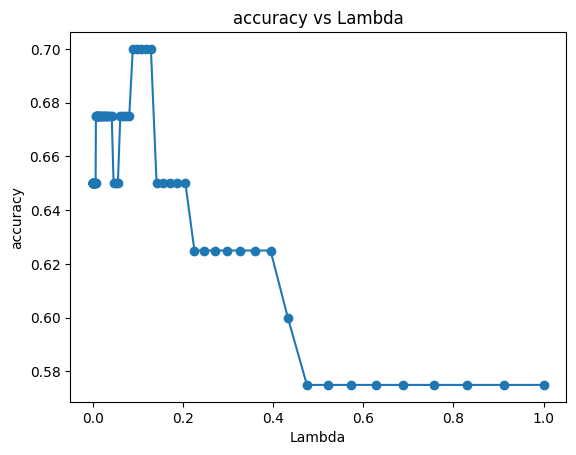

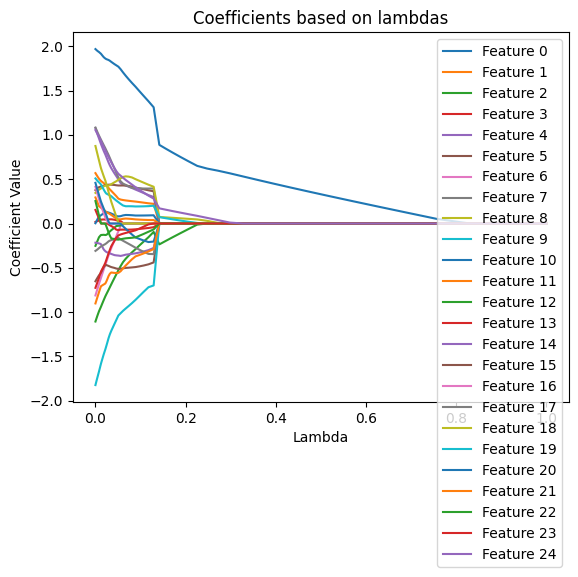

In [6]:
train_and_plot("accuracy")

Training Logistic Regression with metric=balanced_accuracy
Score of sklearn Logistic Regression with L1 penalty: 0.6713554987212276
Score of sklearn Logistic Regression with no penalty: 0.6061381074168798
Score of CCD Logistic Regression: 0.5882352941176471
[ 0.49166667  0.85445953  0.         -0.20563278 -0.          0.
  0.         -0.          0.          0.0703111   0.06256065  0.
  0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.15931493] 0.15264179671752318


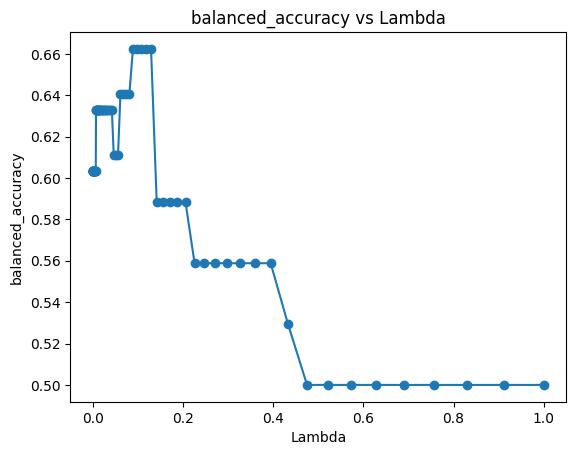

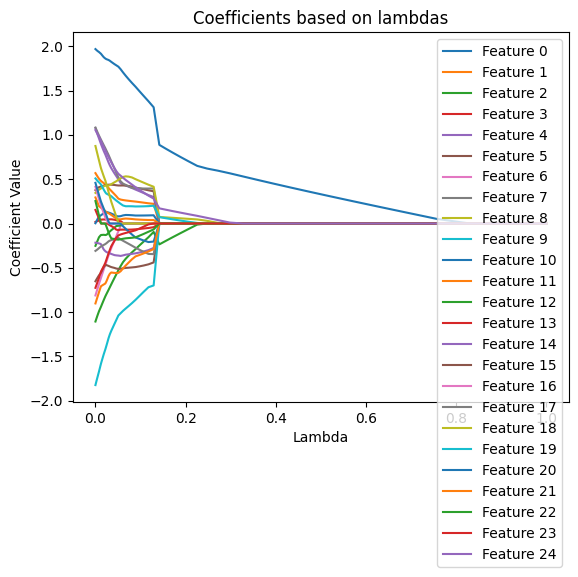

Training Logistic Regression with metric=precision
Score of sklearn Logistic Regression with L1 penalty: 0.7272727272727273
Score of sklearn Logistic Regression with no penalty: 0.6842105263157895
Score of CCD Logistic Regression: 0.6363636363636364
[ 0.49166667  1.96802505  0.56838856 -1.1060567   0.01758299  1.07753412
  0.37717512 -0.81175797  1.08223925  0.34530913  0.50875991  0.00276834
  0.2938829  -0.25193393  0.152755   -0.216571   -0.65175196  0.41497083
 -0.30885379  0.87446553 -1.8230218   0.45888864 -0.90180955  0.25370029
 -0.7258028   1.053927  ] 0.0001


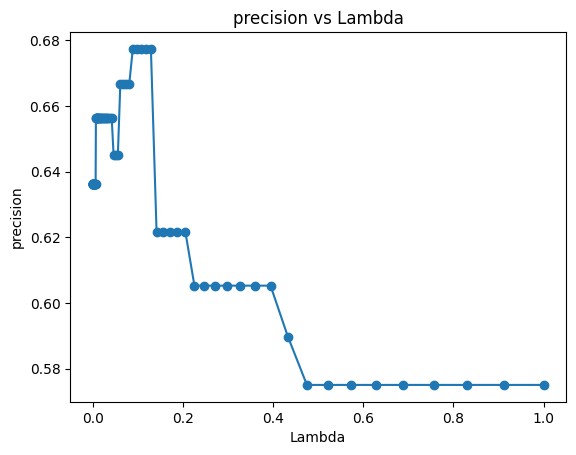

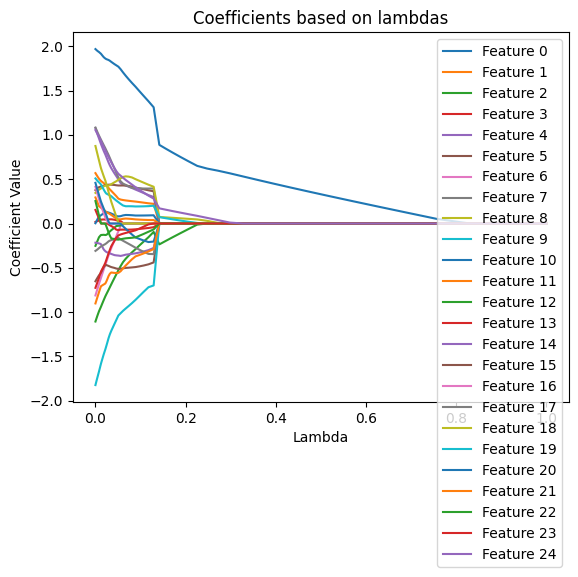

Training Logistic Regression with metric=recall
Score of sklearn Logistic Regression with L1 penalty: 0.6956521739130435
Score of sklearn Logistic Regression with no penalty: 0.5652173913043478
Score of CCD Logistic Regression: 1.0
[ 0.49166667  0.25368421  0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.        ] 0.5689866029018293


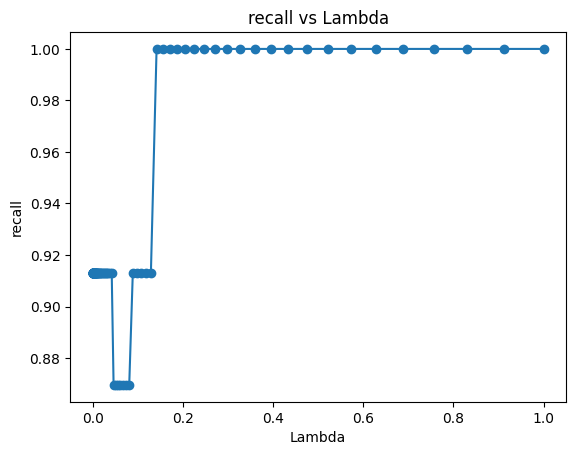

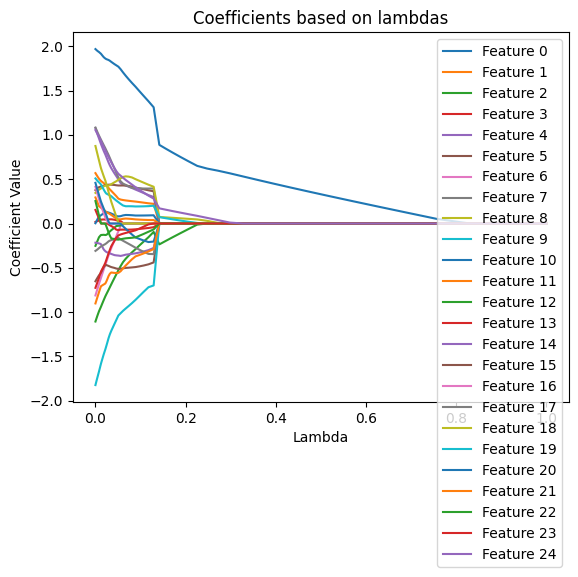

Training Logistic Regression with metric=f1
Score of sklearn Logistic Regression with L1 penalty: 0.7111111111111111
Score of sklearn Logistic Regression with no penalty: 0.6190476190476191
Score of CCD Logistic Regression: 0.7666666666666667
[ 0.49166667  0.85445953  0.         -0.20563278 -0.          0.
  0.         -0.          0.          0.0703111   0.06256065  0.
  0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.15931493] 0.15264179671752318


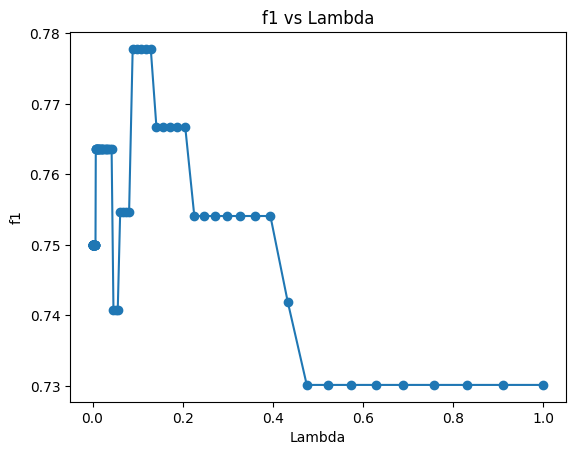

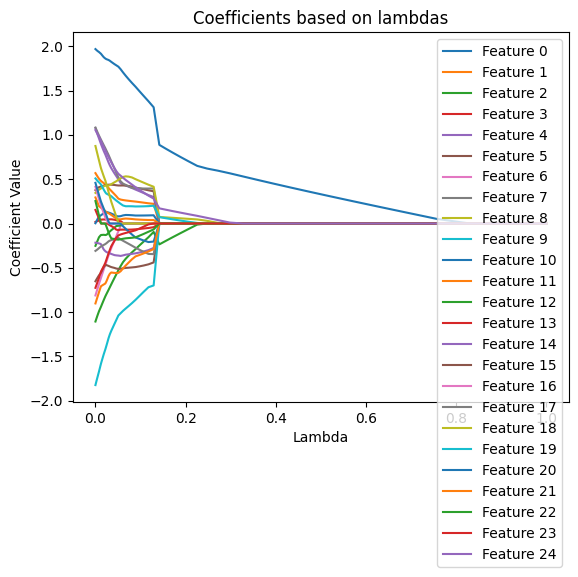

Training Logistic Regression with metric=auc_roc
Score of sklearn Logistic Regression with L1 penalty: 0.6777493606138107
Score of sklearn Logistic Regression with no penalty: 0.5754475703324808
Score of CCD Logistic Regression: 0.8363171355498721
[ 0.49166667  0.53533803  0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
  0.          0.        ] 0.32374575428176433


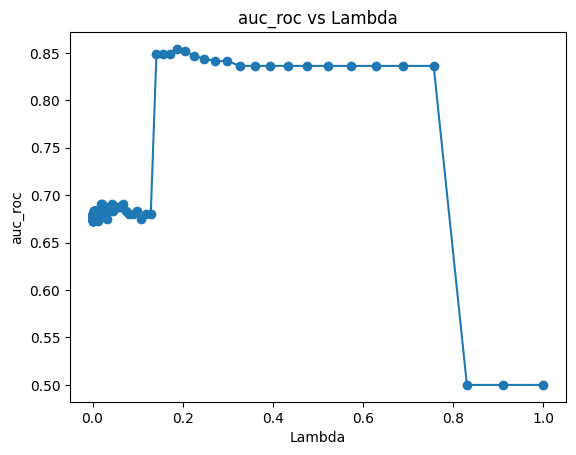

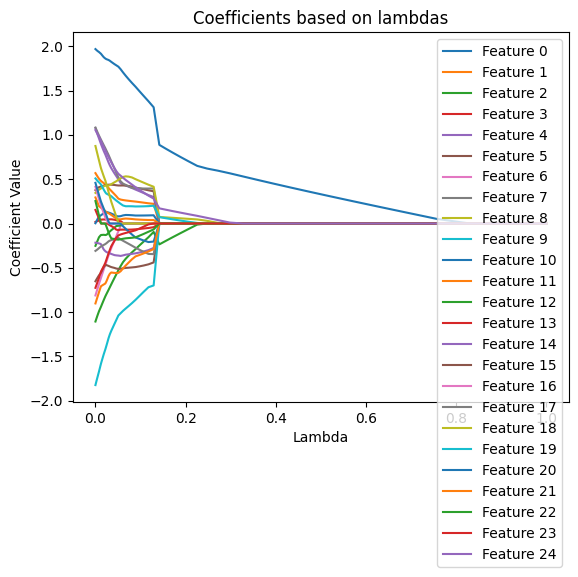

Training Logistic Regression with metric=auc_pr
Score of sklearn Logistic Regression with L1 penalty: 0.7409722464389876
Score of sklearn Logistic Regression with no penalty: 0.695144560471357
Score of CCD Logistic Regression: 0.7875
[ 0.49166667  0.          0.          0.          0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.        ] 0.8286427728546842


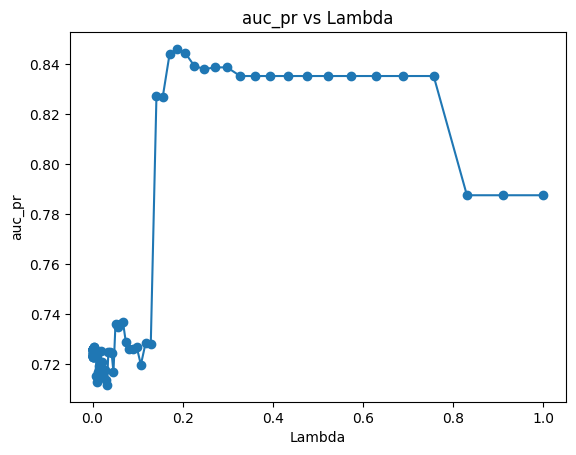

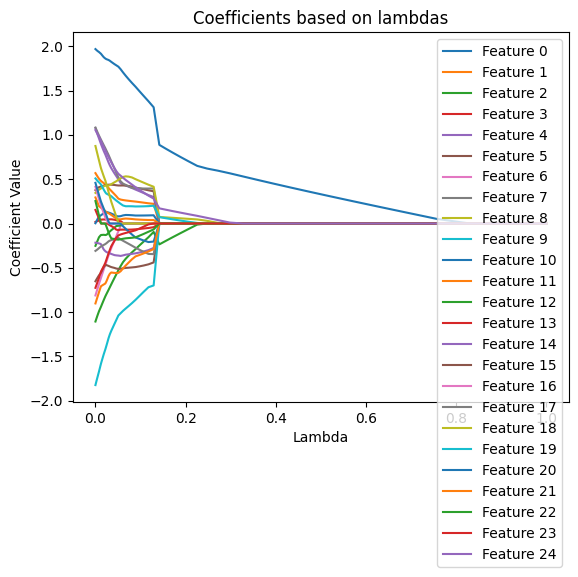

In [7]:
for metric in ["balanced_accuracy", "precision", "recall", "f1", "auc_roc", "auc_pr"]:
    train_and_plot(metric)

In [2]:
X_secom = np.array(pd.read_csv("data/preprocessed_secom.csv"))
y_secom = np.array(pd.read_csv("data/secom_labels.csv")).flatten()

In [12]:
y_secom = y_secom > 0

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_secom, y_secom, test_size=0.4)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [14]:
# sklearn logitsic regression with no penalty
log_reg = LogisticRegression(penalty=None)
log_reg.fit(X_train, y_train)
accuracy_log_reg = accuracy_score(y_test, log_reg.predict(X_test))
print("Accuracy of sklearn Logistic Regression with no penalty:", accuracy_log_reg)

# sklearn logistic regression with L1 penalty
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train, y_train)
accuracy_log_reg_l1 = accuracy_score(y_test, log_reg_l1.predict(X_test))
print("Accuracy of sklearn Logistic Regression with L1 penalty:", accuracy_log_reg_l1)

c:\Users\MateuszAndryszak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of sklearn Logistic Regression with no penalty: 0.8694267515923567
Accuracy of sklearn Logistic Regression with L1 penalty: 0.8280254777070064


In [19]:
def train_and_plot(metric):
    print("Training Logistic Regression with metric={}".format(metric))
    log_reg_ccd = LogRegCCD(max_iter=100)
    log_reg_ccd.fit(X_train, y_train, X_valid, y_valid, np.logspace(-4, 0, 10), metric=metric)
    score_log_reg_ccd = log_reg_ccd.validate(X_test, y_test, metric=metric)

    score_log_reg_l1 = evaluate_model(y_test, log_reg_l1.predict(X_test), log_reg_l1.predict_proba(X_test)[:, 1], metric=metric)
    print("Score of sklearn Logistic Regression with L1 penalty:", score_log_reg_l1)
    score_log_reg = evaluate_model(y_test, log_reg.predict(X_test), log_reg.predict_proba(X_test)[:, 1], metric=metric)
    print("Score of sklearn Logistic Regression with no penalty:", score_log_reg)

    print("Score of CCD Logistic Regression:", score_log_reg_ccd)
    # print(log_reg_ccd.best_beta, log_reg_ccd.best_lambda)
    log_reg_ccd.plot(X_train, y_train, X_test, y_test, np.logspace(-4, 0, 10), metric=metric)
    # log_reg_ccd.plot_coefficients(np.logspace(-4, 0, 2), X_train, y_train, metric=metric)

Training Logistic Regression with metric=accuracy
Score of sklearn Logistic Regression with L1 penalty: 0.8280254777070064
Score of sklearn Logistic Regression with no penalty: 0.8694267515923567
Score of CCD Logistic Regression: 0.9394904458598726


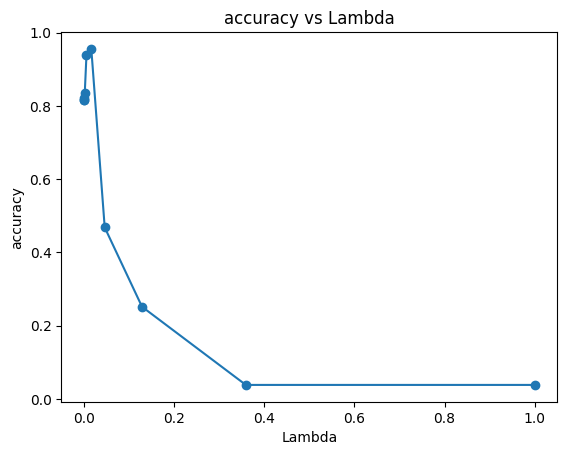

In [20]:
train_and_plot("accuracy")